<center><h1 style="color:red">Plotting Techniques in Python</h1></center>

## - This Notebook contains all kind of plots that are listed below and contains basic example to the advnace real world problem 

## - You will learn how and when to use plots and effecient plot techniques.
<br><div style="color:green"><center>
<h1>Don't forget to upvote if you like it! It's free! :)</h1>
<h1>Thanks and be safe!</h1>
</center></div>

<h1 style="color:blue">Contents:</h1>

<b><ul>
<li> Scatter Plots
<li> Line Plots
<li> Bar Plots
<li> Sub Plots
<li> Pair Plots
<li> Box Plots
<li> Swarm Plots
<li> Violin Plots
<li> Regression Plots
<li> Count Plots
<li> HeatMap
</ul> 
-> Bonus: 10 Simple Rules for better plotting.
</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Scatter Plots

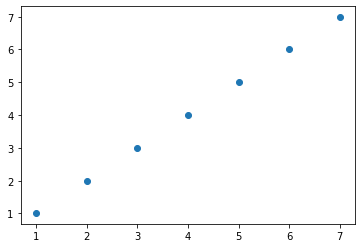

In [2]:
x = np.array([1,2,3,4,5,6,7])
y = x

plt.figure()
plt.scatter(x,y);

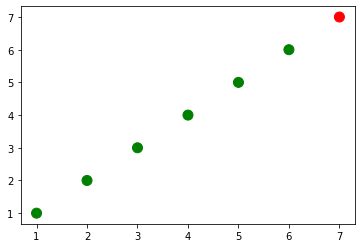

In [3]:
colors = ['green']*(len(x))
colors[-1] = 'red'

plt.figure()
plt.scatter(x,y,c=colors,s=100)

No handles with labels found to put in legend.


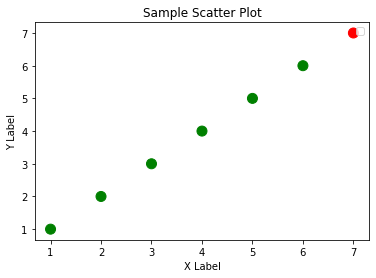

In [4]:
colors = ['green']*(len(x))
colors[-1] = 'red'

plt.figure()
plt.scatter(x,y,c=colors,s=100)
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.legend()
plt.title('Sample Scatter Plot');

**We aren't able to add legend so let's use different technique**

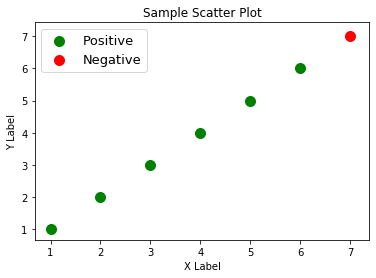

In [5]:
plt.figure()
plt.scatter(x[:-1], y[:-1], c='green', s=100, label='Positive')
plt.scatter(x[-1], y[-1], c='red', s=100, label='Negative')
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.legend(loc = "upper left", fontsize = 13)
plt.title('Sample Scatter Plot');

**Example of a youtube video data**

In [6]:
df1 = pd.read_csv('../../Corey-Youtube/Matplotlib/data4.csv')
print(df1.head())

view_count = df1['view_count']
likes = df1['likes']
ratio = df1['ratio']

   view_count   likes  ratio
0     8036001  324742  96.91
1     9378067  562589  98.19
2     2182066  273650  99.38
3     6525864   94698  96.25
4     9481284  582481  97.22


**Let's represent this data with Scatter plots**

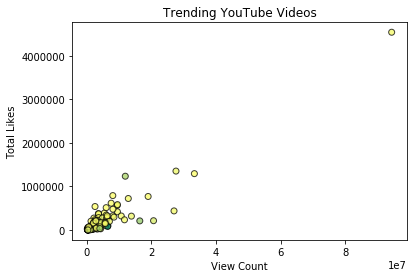

In [7]:
plt.figure()
plt.scatter(view_count, likes, c=ratio, cmap='summer', edgecolor='black', linewidth=1, alpha=0.75)
plt.title('Trending YouTube Videos')
plt.xlabel('View Count')
plt.ylabel('Total Likes');

**Not effective because numbers are comparatively very large!, Apply log to avoid that.**

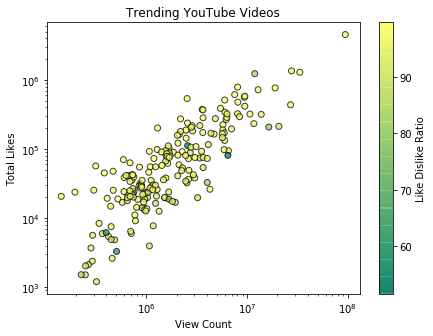

In [8]:
plt.figure(figsize=(7,5))
plt.scatter(view_count, likes, c=ratio, cmap='summer', edgecolor='black', linewidth=1, alpha=0.75)

plt.xscale('log')
plt.yscale('log')

cbar = plt.colorbar()
cbar.set_label('Like Dislike Ratio')

plt.title('Trending YouTube Videos')
plt.xlabel('View Count')
plt.ylabel('Total Likes');

# Line Plots

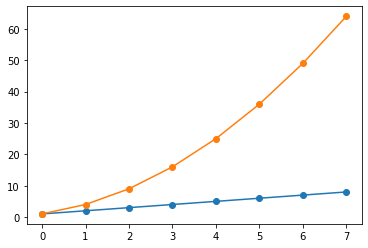

In [9]:
linear_data = np.array([1,2,3,4,5,6,7,8])
exponential_data = linear_data**2

# plot the linear data and the exponential data
plt.plot(linear_data, '-o', exponential_data, '-o')

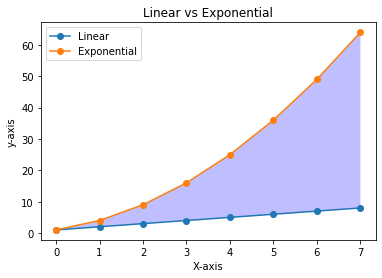

In [10]:
plt.plot(linear_data, '-o', exponential_data, '-o')

plt.xlabel('X-axis')
plt.ylabel('y-axis')
plt.title('Linear vs Exponential')
# add a legend with legend entries (because we didn't have labels when we plotted the data series)
plt.legend(['Linear', 'Exponential'])

plt.fill_between(range(len(linear_data)), 
                       linear_data, exponential_data, 
                       facecolor='blue', 
                       alpha=0.25);

**Data from stackoverflow developing survey**

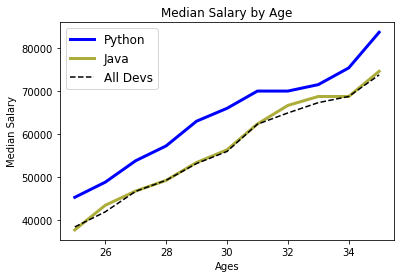

In [44]:
ages_x = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
python = [45372, 48876, 53850, 57287, 63016, 65998, 70003, 70000, 71496, 75370, 83640]
java = [37810, 43515, 46823, 49293, 53437, 56373, 62375, 66674, 68745, 68746, 74583]
Others = [38496, 42000, 46752, 49320, 53200, 56000, 62316, 64928, 67317, 68748, 73752]

plt.plot(ages_x, python, 'b', linewidth=3, label='Python')   
plt.plot(ages_x, java, color='#adad3b', linewidth=3, label='Java')
plt.plot(ages_x, Others, color='black', linestyle='--', label='All Devs')

plt.title('Median Salary by Age')
plt.xlabel('Ages')
plt.ylabel('Median Salary')
plt.legend(fontsize=12);   #necessary to give labels to the line/ You can also pass label as argument inside legend

# Bar Plots

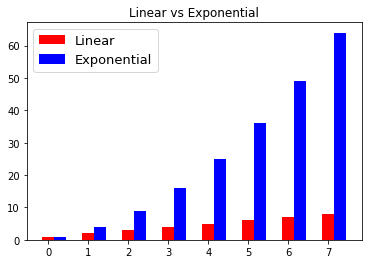

In [12]:
linear_data = np.array([1,2,3,4,5,6,7,8])
exponential_data = linear_data**2
xvals = range(len(linear_data))
xvals1 = []
for item in xvals:
    xvals1.append(item+0.3) #Because width of first bar is 0.3
    
plt.bar(xvals, linear_data, width = 0.3, color='red', label='Linear')
plt.bar(xvals1, exponential_data, width=0.3, color='blue', label='Exponential')
plt.title('Linear vs Exponential')
plt.legend(fontsize=13);

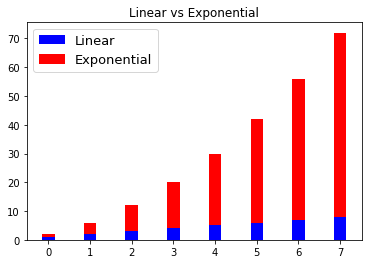

In [13]:
plt.bar(xvals, linear_data, width = 0.3, color='b', label='Linear')
plt.bar(xvals, exponential_data, width = 0.3, bottom=linear_data, color='r', label='Exponential')
plt.title('Linear vs Exponential')
plt.legend(fontsize=13);

**Stackoverflow developing survey**

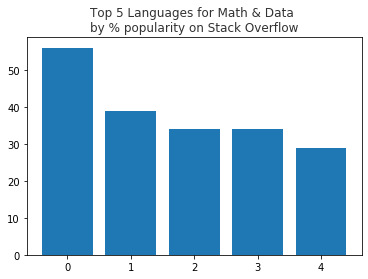

In [14]:
languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

plt.bar(pos, popularity, align='center')
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8);

**The above plot Contains lots of junk, such as:**

- No X-labels
- Graph is about % popularity so need of Y-labels
- Same color bars
- Plot looks heavier

**Let's dejunkify the plot**

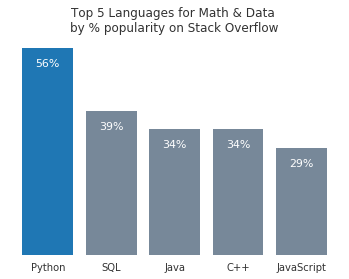

In [15]:
# change the bar colors to be less bright blue
bars = plt.bar(pos, popularity, align='center', linewidth=0, color='lightslategrey')
# make one bar, the python bar, a contrasting color
bars[0].set_color('#1F77B4')

# soften all labels by turning grey
plt.xticks(pos, languages, alpha=0.8)
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

#remove ytick labels
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# direct label each bar with Y axis values
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5, str(int(bar.get_height())) + '%', 
                 ha='center', color='w', fontsize=11)

# Sub Plots

**Let's compare two figure we just created above with Subplot**

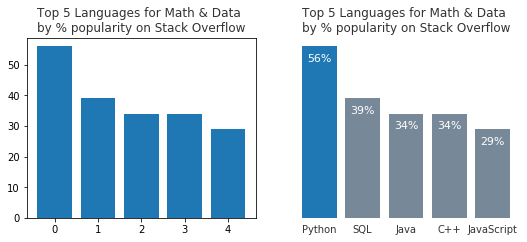

In [16]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1) #number of rows, number of columns, current position
plt.bar(pos, popularity, align='center')
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

plt.subplot(1,2,2) #number of rows, number of columns, current position
bars = plt.bar(pos, popularity, align='center', linewidth=0, color='lightslategrey')
bars[0].set_color('#1F77B4')
plt.xticks(pos, languages, alpha=0.8)
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5, str(int(bar.get_height())) + '%', 
                 ha='center', color='w', fontsize=11)
    
plt.tight_layout(pad=3)

**Subplots for iris_datasets**

In [29]:
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


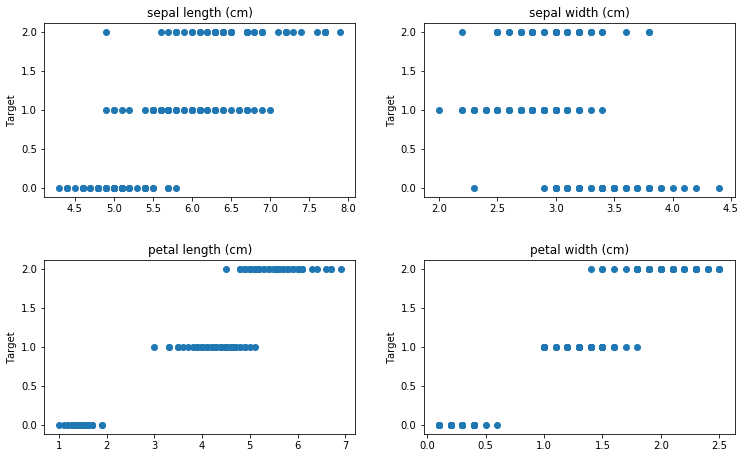

In [41]:
plt.figure(figsize=(11,7))

for i in range(1, len(df.columns)):
    plt.subplot(2, 2, i)
    plt.scatter(df.iloc[:,i-1], df['target'])
    plt.title(df.columns[i-1])
    plt.ylabel('Target')
    
plt.tight_layout(pad=3)

# Pair Plots

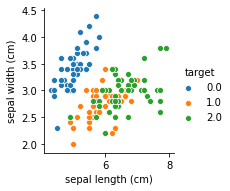

In [57]:
import seaborn as sns

sns.pairplot(data=df, x_vars='sepal length (cm)', y_vars='sepal width (cm)', hue='target');

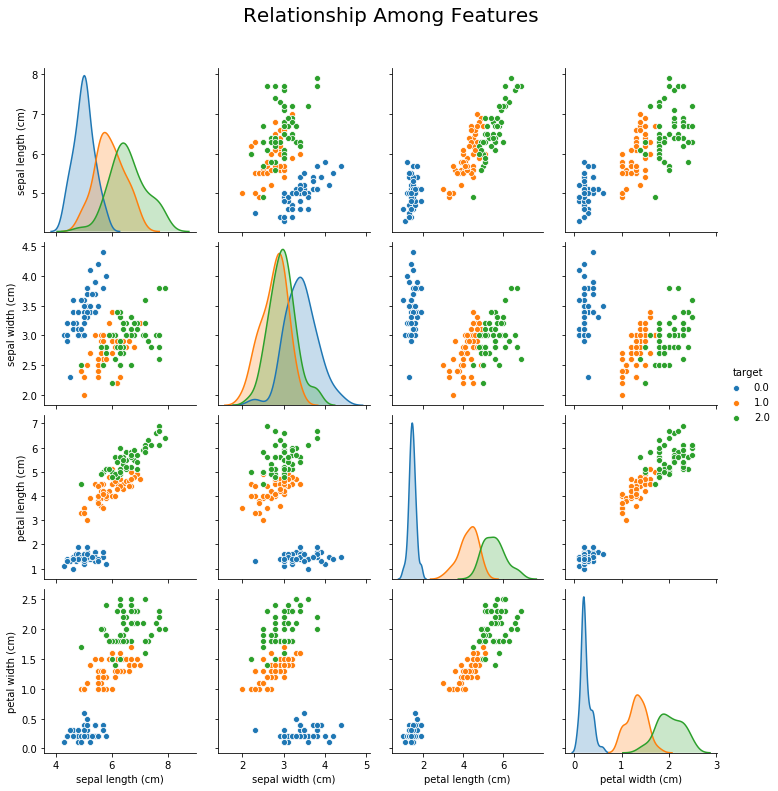

In [67]:
g = sns.pairplot(data=df, x_vars=df.columns[:-1], y_vars=df.columns[:-1], hue='target')
g.fig.suptitle('Relationship Among Features', y=1.08, fontsize=20);

# Box Plots

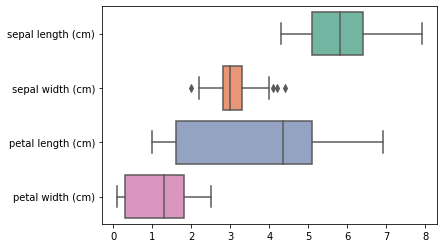

In [72]:
sns.boxplot(data=df.drop(columns='target'), orient="h", palette="Set2")

# Swarm Plots

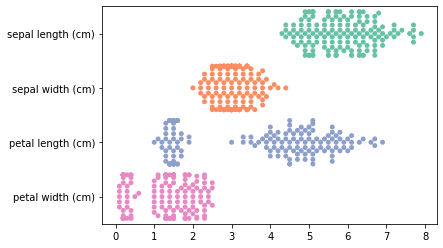

In [74]:
sns.swarmplot(data=df.drop(columns='target'), orient="h", palette="Set2")

# Violin Plots

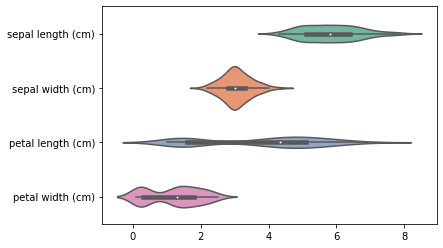

In [75]:
sns.violinplot(data=df.drop(columns='target'), orient="h", palette="Set2")

# Regression Plots

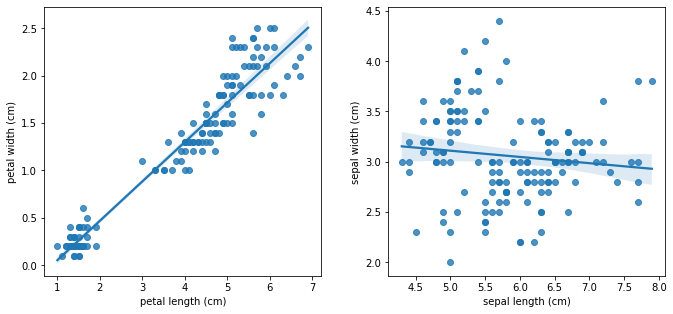

In [86]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.regplot(df['petal length (cm)'], df['petal width (cm)'])

plt.subplot(1,2,2)
sns.regplot(df['sepal length (cm)'], df['sepal width (cm)'])

plt.tight_layout(pad=3)

# Count Plots

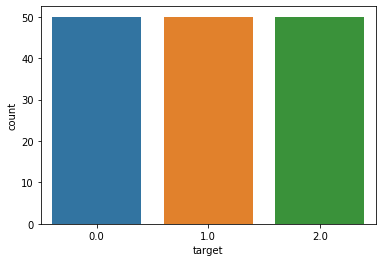

In [124]:
sns.countplot(x='target', data=df);

**This indicates data is in equal proportion**

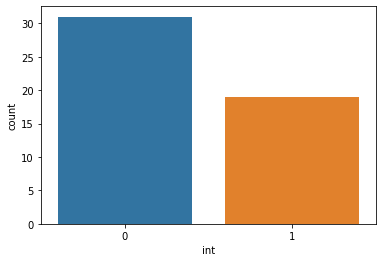

In [126]:
list1 = np.random.randint(2, size=50)
test = pd.DataFrame(list1, columns=['int'])

sns.countplot(x='int', data=test);

# Count plot to comapre two feature

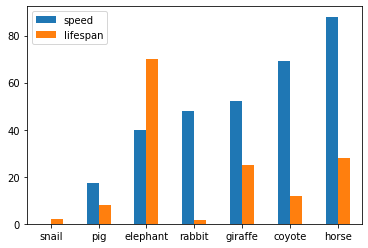

In [128]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant', 'rabbit', 'giraffe', 'coyote', 'horse']
df1 = pd.DataFrame({'speed': speed, 'lifespan': lifespan}, index=index)
ax = df1.plot.bar(rot=0)

# HeatMap

**Generally used to describe correlation among data**

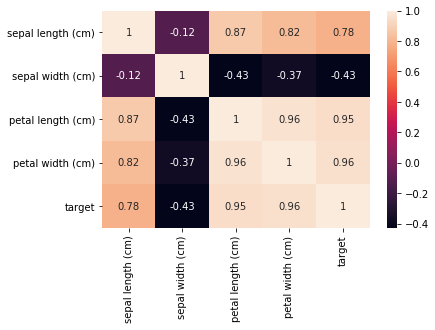

In [90]:
sns.heatmap(df.corr(), annot=True);

**Can also be used to analyze null values**

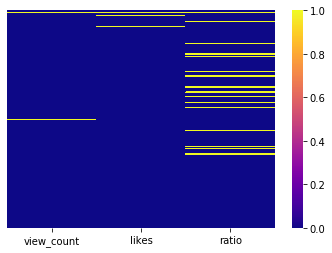

In [122]:
sns.heatmap(df1.isnull(), yticklabels=False, cmap='plasma')

**The yellow lines indicate the null values**

<center><h1> 10 Simple Rules for Better Plotting</h1></center>

* Rule 1: Know Your Audience.
> You plot has to be designed with your audience in mind. It's not the same to communicate with professional scientist, upper managment or with general public.
> Remmember that when you are thinking about the plot.
* Rule 2: Identify Your Message
> Your figure must containg a message in order to be succeful. Take your time to think about the message you want to send, and once it's clear for you
> starts developing the figure.
* Rule 3: Adapt the Figure to the Support Medium
> This is a more practical rule. Know where your figures will be presented and adapt the figure accordingly.
> It's not the same if the figure will be in a powerpoing, journal or an email.
> If it's part of a bigger presentatio, make the lines bolder, the plot simpler so that the viewer can instantly
> understand it.
* Rule 4: Captions Are Not Optional
> Provide additional information or data for facilitate the comprehension of the plot.
> In a bar chart, if it's relevant, add the numbers to facilitate the comparison.
> If needed, add an example about how to read the plot.
* Rule 5: Do Not Trust the Defaults
> The defaults of any plotting library are good enough for any plot but they are best for none.
> Adjust the color palletes, the fontsize, title, spines, axies and so on for the figure.
> To make it more readable and more nicer to look at.
* Rule 6: Use Color Effectively
> We have associated feelings with specific colors so use them accordingly. There are 3 colorsmaps, use the most relevant for your data:
> 1. Sequential: one variation of a unique color, used for quantitative data varying from low to high.
> 2. Diverging: variation from one color to another, used to highlight deviation from a median value.
> 2. Qualitative: rapid variation of colors, used mainly for discrete or categorical data.
* Rule 7: Do Not Mislead the Reader
> Try to show the data as objectively as possible. Some tools are very bad by nature: like pie charts or 3D charts when comparing quantities.
> As a rule of thumb, make sure to always use the simplest type of plots that can convey your message and make sure to use labels, ticks, title, and the full range of values when relevant.
* Rule 8: Avoid “Chartjunk”
> Chartjunk refers to all the unnecessary or confusing visual elements found in a figure that do not improve the message (in the best case) or add confusion (in the worst case). 
> For example, chartjunk may include the use of too many colors, too many labels, gratuitously colored backgrounds, useless grid lines, etc.
* Rule 9: Message Trumps Beauty
> In science, message and readability of the figure is the most important aspect while beauty is only an option.
* Rule 10: Get the Right Tool
> There are a lot of libraries that you can use to make plots and figures. You have plenty of libraries in Python, R, Javascript, Matlab, Excel, Tableau and others.
> Use the right tool for each plot.

<center><b>Planning for second notebook if i get enough upvote in this notebook</b></center>